# 다중분류를 이용한 붓꽃 데이터 분류

In [ ]:
`%tensorflow_version 1.x
import tensorflow as tf
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
datasets.load_iris()
iris = datasets.load_iris()

In [ ]:
X = iris.data
X = np.array(X , dtype="float32")
y = iris.target
y = y.reshape(-1, 1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# onehot 인코딩 할 객체
enc = OneHotEncoder()

# y_train 몇가지 종류인지 파악
enc.fit(y_train)

# toarray() : one hot encording 한 데이터 numpy배열로 변환
y_train_onehot = enc.transform(y_train).toarray()

# 데이터타입 변환하여 덮어쓰기
y_train_onehot = np.array(y_train_onehot, dtype="float32")

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 객체 생성
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

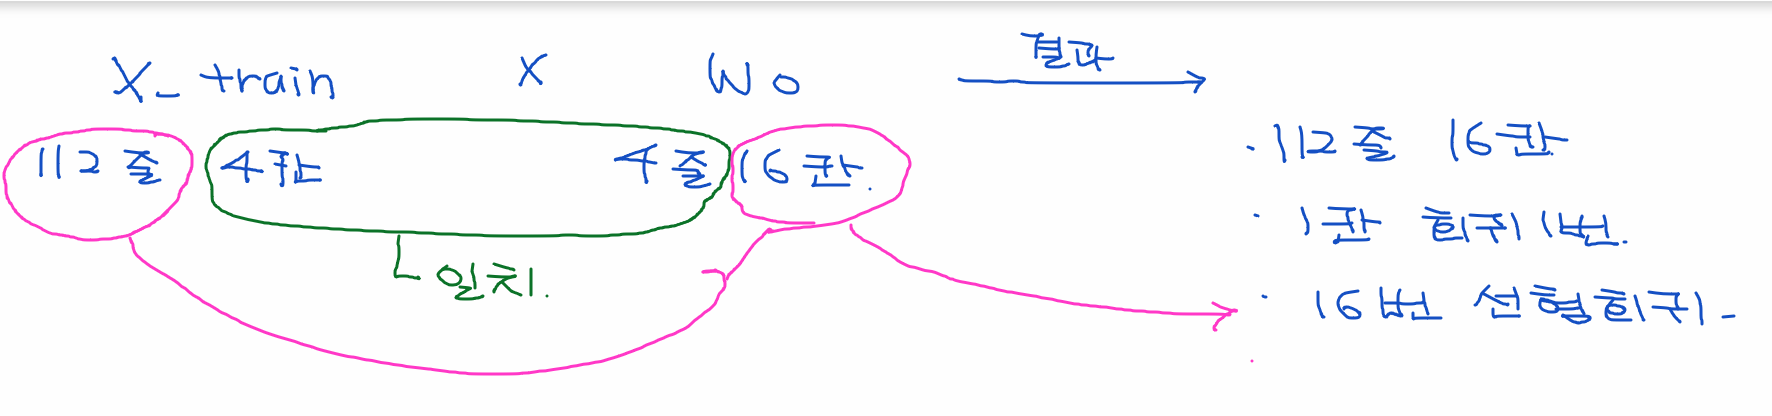

In [ ]:
initializer = tf.contrib.layers.xavier_initializer()

In [ ]:
# 4줄 16칸
initializer([4,16])

<tf.Tensor 'random_uniform_6:0' shape=(4, 16) dtype=float32>

In [ ]:
w0 = tf.Variable( initializer([4,16]) )
b0 = tf.Variable(initializer([16]))

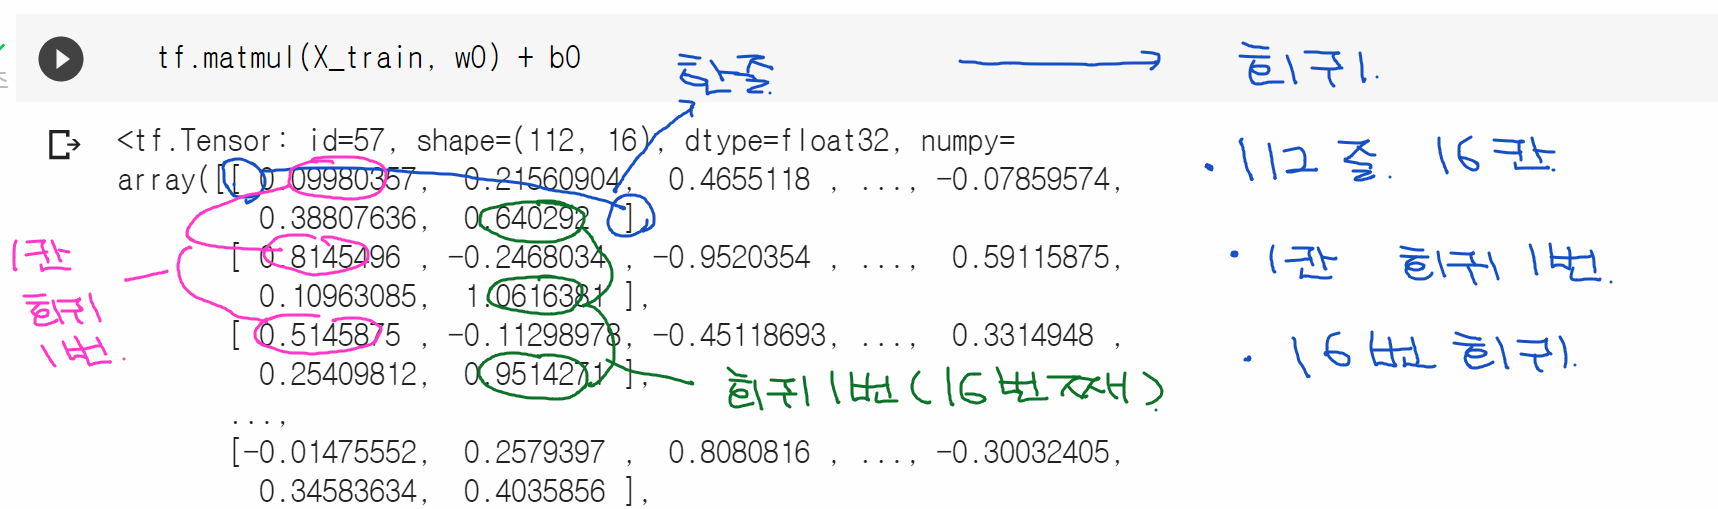

In [ ]:
hypothesis0 = tf.matmul(X_train, w0) + b0

In [ ]:
X_train.shape

(112, 4)

In [ ]:
from scipy import stats

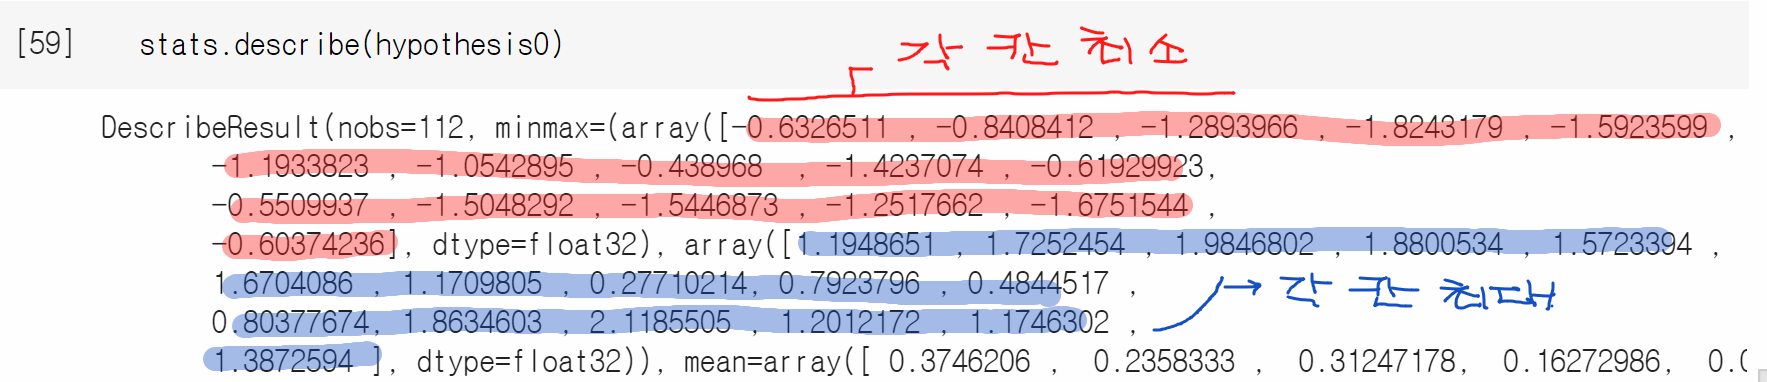

In [ ]:
stats.describe(hypothesis0)

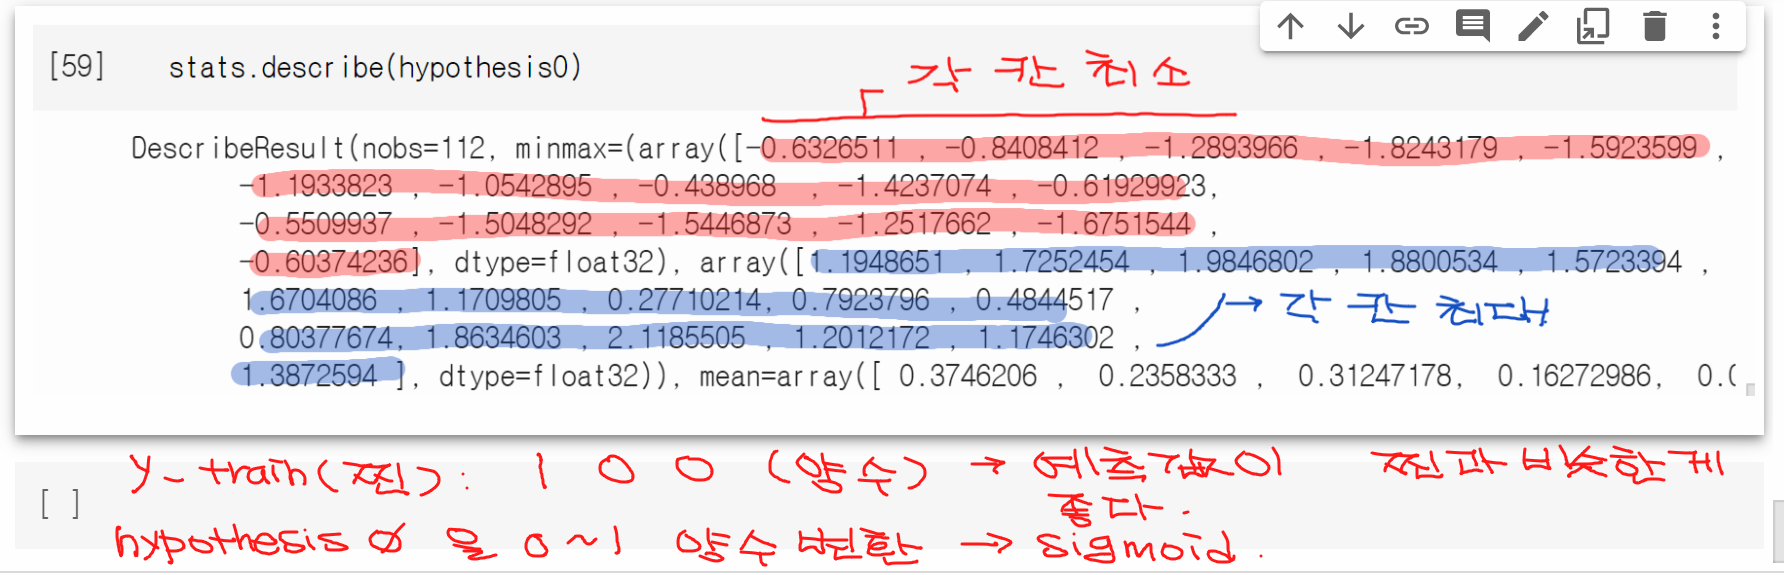

sigmoid : 활성함수 쓰는 이유 반복횟수를 줄이려고 쓰는 거임 안쓰면 찐이랑 예측값이 좀 다름

In [ ]:
hypothesis0 = tf.sigmoid(tf.matmul(X_train, w0) + b0)

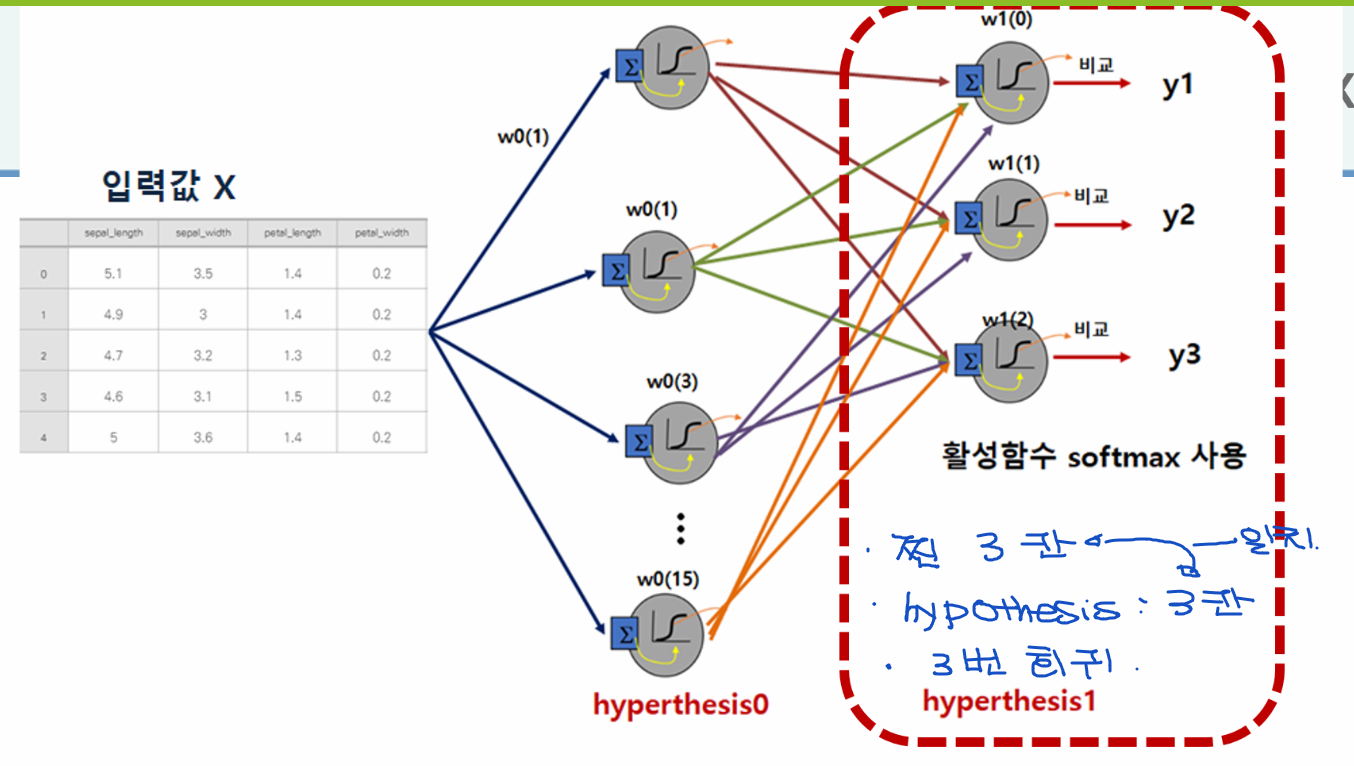

In [ ]:
hypothesis0.shape

TensorShape([Dimension(112), Dimension(16)])

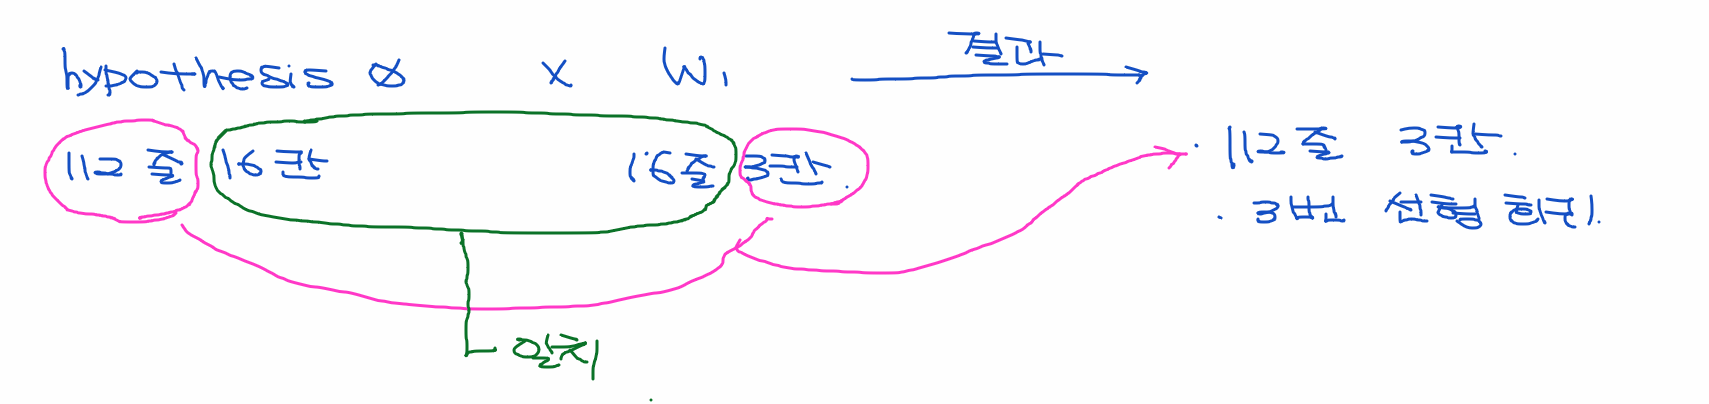

In [ ]:
w1 = tf.Variable(initializer([16,3]))
b1 = tf.Variable(initializer([3]))

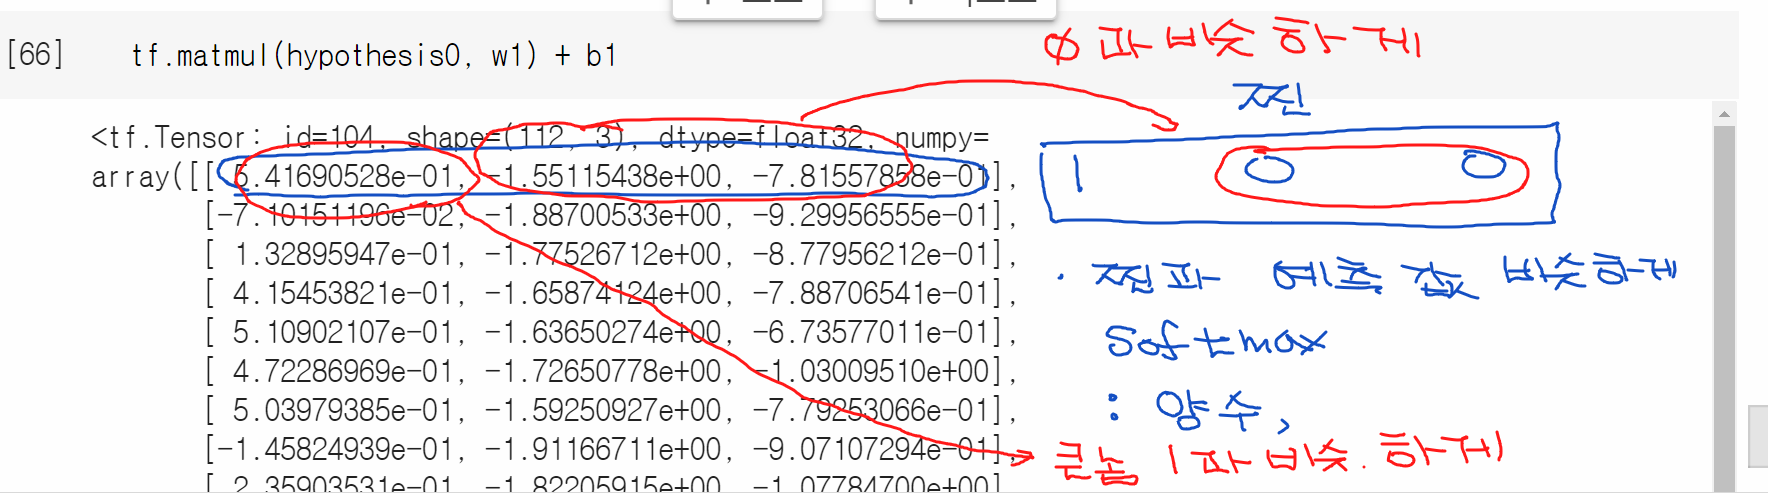

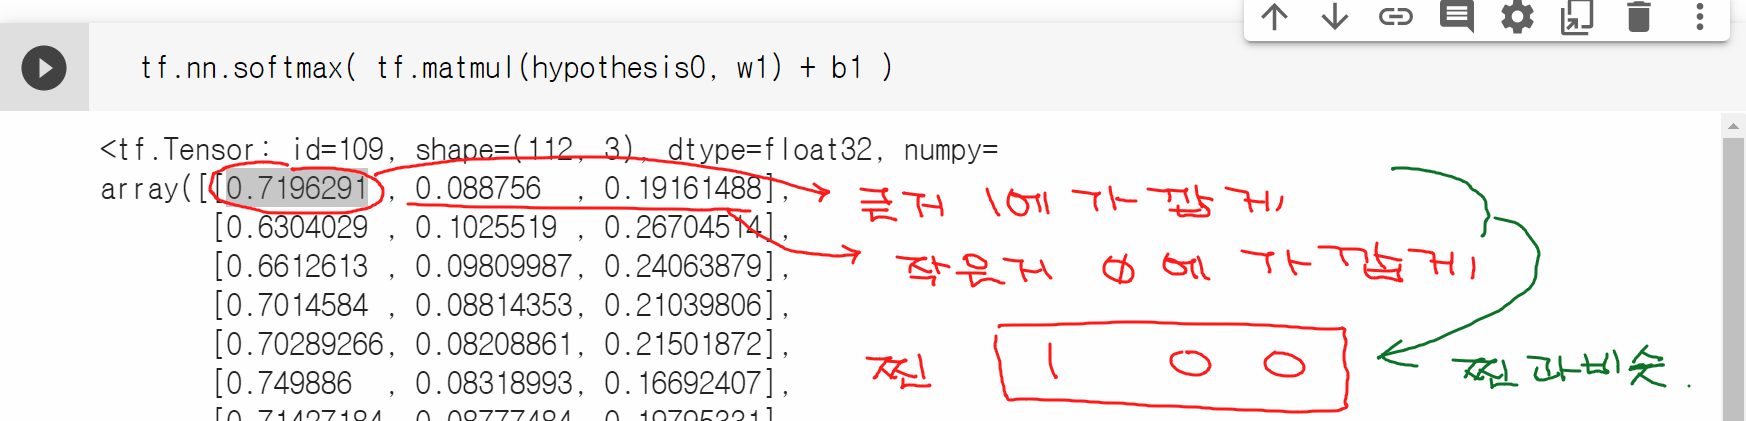

In [ ]:
hypothesis1 = tf.nn.softmax( tf.matmul(hypothesis0, w1) + b1 )

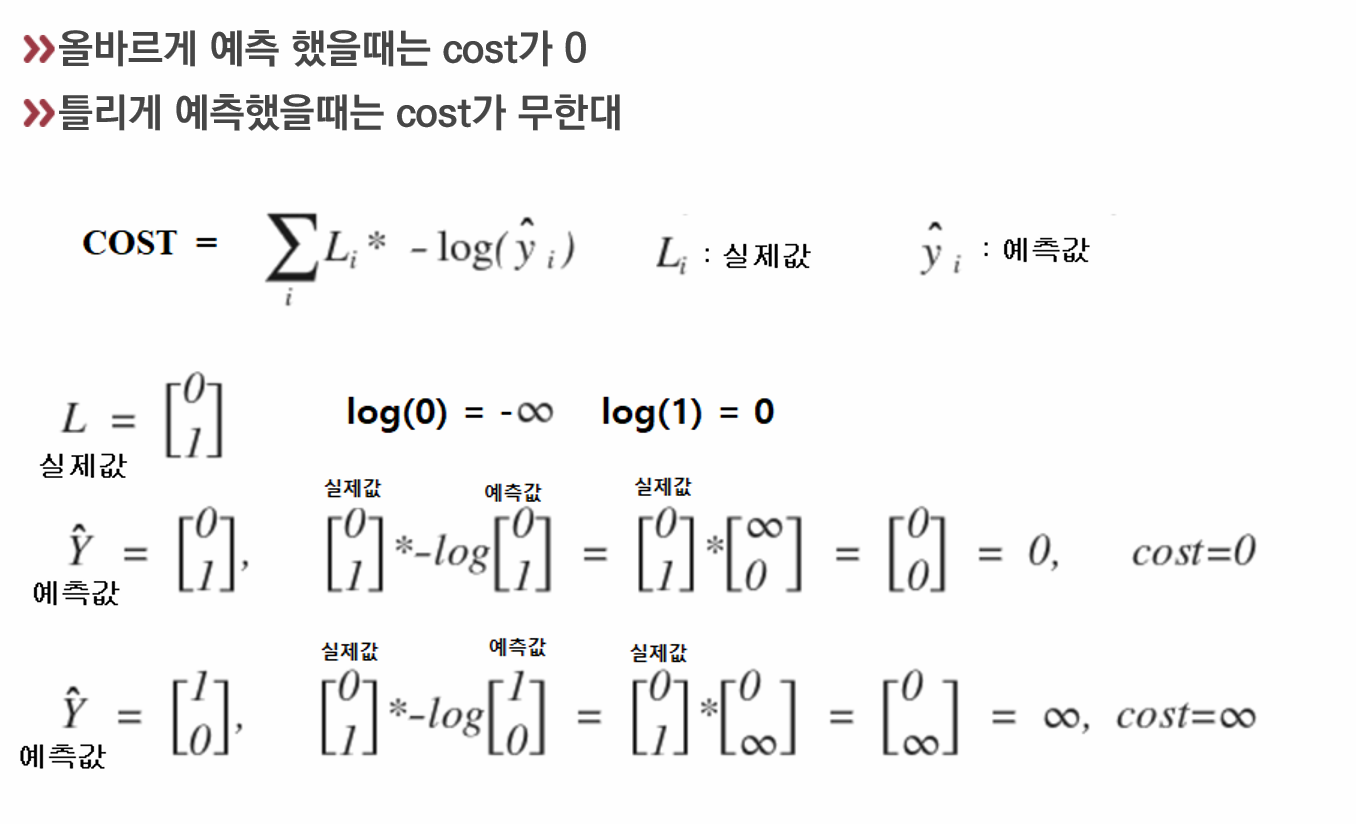

In [ ]:
hypothesis0 = tf.sigmoid(tf.matmul(X_train, w0) + b0)
hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1 )
cost = -tf.reduce_mean(y_train_onehot * tf.log(hypothesis1))
print("cost = ", cost)

cost =  tf.Tensor(0.48984218, shape=(), dtype=float32)


In [ ]:
optimizer = tf.train.AdamOptimizer(0.1)

In [ ]:
for step in range(1001):
    print("="*100)
    print("step=",step)
    
    with tf.GradientTape() as tape:
        hypothesis0 = tf.sigmoid(tf.matmul(X_train, w0) + b0)
        hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1 )
        cost = -tf.reduce_mean(y_train_onehot * tf.log(hypothesis1))
        print("cost = ", cost)
        grads = tape.gradient(cost, [w0,w1,b0,b1])
        optimizer.apply_gradients(grads_and_vars=zip(grads,[w0,w1,b0,b1]))  